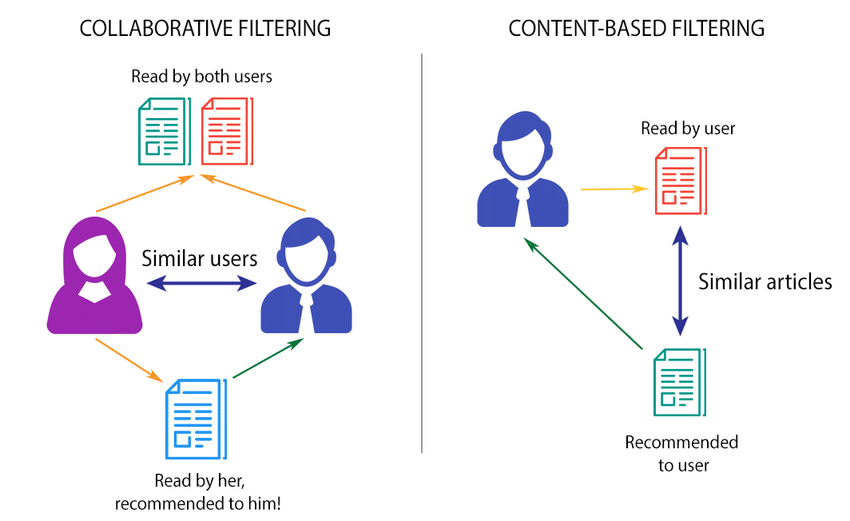

In [1]:
from IPython.display import Image
Image(filename="Content-based-filtering-vs-Collaborative-filtering-Source.png")

# Content Based Filtering

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.DataFrame(
    {'title': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
     'genre': ['Pop', 'Keroncong', 'Dangdut', 'Pop', 'Keroncong', 'Dangdut', 'Pop', 'Keroncong', 'Dangdut', 'Pop'],
     'label': ['PT. A', 'PT. A', 'PT. B', 'PT. B', 'PT. B', 'PT. A', 'PT. A', 'PT. B', 'PT. B', 'PT. A']},
)
df

,title,genre,label
0,A,Pop,PT. A
1,B,Keroncong,PT. A
2,C,Dangdut,PT. B
3,D,Pop,PT. B
4,E,Keroncong,PT. B
5,F,Dangdut,PT. A
6,G,Pop,PT. A
7,H,Keroncong,PT. B
8,I,Dangdut,PT. B
9,J,Pop,PT. A


In [4]:
ecv = CountVectorizer()
mgenre = ecv.fit_transform(df['genre'])
mgenre

<10x3 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [5]:
print(mgenre)

  (0, 2)	1
  (1, 1)	1
  (2, 0)	1
  (3, 2)	1
  (4, 1)	1
  (5, 0)	1
  (6, 2)	1
  (7, 1)	1
  (8, 0)	1
  (9, 2)	1


In [6]:
mgenre.toarray()

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [7]:
ecv.get_feature_names()

['dangdut', 'keroncong', 'pop']

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
co_score = cosine_similarity(mgenre)
co_score

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

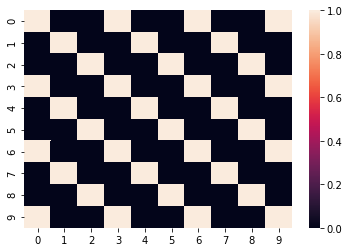

In [10]:
import seaborn as sns
sns.heatmap(co_score)

In [11]:
produk_mirip = list(enumerate(co_score[0]))
produk_mirip

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 1.0),
 (4, 0.0),
 (5, 0.0),
 (6, 1.0),
 (7, 0.0),
 (8, 0.0),
 (9, 1.0)]

In [12]:
produk_mirip = sorted(produk_mirip, key=lambda x: x[1], reverse=True)
produk_mirip[:4]

[(0, 1.0), (3, 1.0), (6, 1.0), (9, 1.0)]

In [13]:
for i in produk_mirip[:4]:
    print(df.iloc[i[0]])

title        A
genre      Pop
label    PT. A
Name: 0, dtype: object
title        D
genre      Pop
label    PT. B
Name: 3, dtype: object
title        G
genre      Pop
label    PT. A
Name: 6, dtype: object
title        J
genre      Pop
label    PT. A
Name: 9, dtype: object


In [14]:
df[df['genre']=='Pop']

,title,genre,label
0,A,Pop,PT. A
3,D,Pop,PT. B
6,G,Pop,PT. A
9,J,Pop,PT. A


In [15]:
animes = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

In [16]:
animes.shape

(12294, 7)

In [17]:
animes['anime_id'].nunique()

12294

In [18]:
ratings.shape

(7813737, 3)

In [19]:
ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [20]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [21]:
import string as str
animes[animes['name'].str.contains('Slam Dunk')]

,anime_id,name,genre,type,episodes,rating,members
79,170,Slam Dunk,"Comedy, Drama, School, Shounen, Sports",TV,101,8.56,82570
903,2499,Slam Dunk: Hoero Basketman-damashii! Hanamichi...,"Comedy, Drama, School, Shounen, Slice of Life,...",Movie,1,7.78,7856
1094,2498,Slam Dunk: Shouhoku Saidai no Kiki! Moero Saku...,"Comedy, Drama, School, Shounen, Slice of Life,...",Movie,1,7.69,7834
1149,1861,Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi,"Comedy, Drama, School, Shounen, Slice of Life,...",Movie,1,7.66,7992
1686,1764,Slam Dunk (Movie),"Comedy, Drama, School, Shounen, Slice of Life,...",Movie,1,7.47,8750


In [22]:
animes.shape

(12294, 7)

In [23]:
animes.dropna(subset=['genre', 'type', 'rating'], inplace=True)
animes.shape

(12017, 7)

In [24]:
animes.genre.value_counts()

Hentai                                                     816
Comedy                                                     521
Music                                                      297
Kids                                                       197
Comedy, Slice of Life                                      174
                                                          ... 
Parody, Shoujo, Sports                                       1
Action, Drama, Police                                        1
Adventure, Drama, Horror, Sci-Fi, Shounen, Supernatural      1
Action, Comedy, Romance, School, Sci-Fi                      1
Action, Adventure, Kids, Mecha, Sci-Fi, Space                1
Name: genre, Length: 3229, dtype: int64

In [25]:
ext = CountVectorizer(tokenizer= lambda x: x.split(', '))
mgenre = ext.fit_transform(animes['genre'])

print(len(ext.get_feature_names()))
print(ext.get_feature_names())

43
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri']


In [27]:
mgenre.toarray().shape

(12017, 43)

In [28]:
co_score = cosine_similarity(mgenre)
co_score

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18898224, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [30]:
co_score.shape

(12017, 12017)

In [34]:
i = 0
print(animes.iloc[i])
print(co_score[i])

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                       1
rating                                      9.37
members                                   200630
Name: 0, dtype: object
[1.         0.18898224 0.         ... 0.         0.         0.        ]


In [36]:
fav_anime = 'Kimi no Na wa.'
fav_idx = animes[animes['name'] == fav_anime].index[0]
fav_idx

0

In [38]:
anime_dict = dict(enumerate(co_score[fav_idx]))
anime_dict

{0: 1.0,
 1: 0.1889822365046136,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.4472135954999579,
 6: 0.0,
 7: 0.25,
 8: 0.0,
 9: 0.0,
 10: 0.6708203932499369,
 11: 0.5773502691896258,
 12: 0.0,
 13: 0.20412414523193154,
 14: 0.4472135954999579,
 15: 0.5773502691896258,
 16: 0.6708203932499369,
 17: 0.1889822365046136,
 18: 0.0,
 19: 0.20412414523193154,
 20: 0.25,
 21: 0.4082482904638631,
 22: 0.20412414523193154,
 23: 0.1889822365046136,
 24: 0.0,
 25: 0.6123724356957946,
 26: 0.4472135954999579,
 27: 0.1889822365046136,
 28: 0.1889822365046136,
 29: 0.0,
 30: 0.4472135954999579,
 31: 0.4472135954999579,
 32: 0.25,
 33: 0.1889822365046136,
 34: 0.4472135954999579,
 35: 0.5,
 36: 0.25,
 37: 0.25,
 38: 0.1889822365046136,
 39: 0.5,
 40: 0.22360679774997896,
 41: 0.0,
 42: 0.25,
 43: 0.4472135954999579,
 44: 0.25,
 45: 0.6123724356957946,
 46: 0.4472135954999579,
 47: 0.0,
 48: 0.1889822365046136,
 49: 0.25,
 50: 0.2886751345948129,
 51: 0.0,
 52: 0.22360679774997896,
 53: 0.25,
 54: 0.25,
 55: 0.0,


In [39]:
recom = list()
for k, v in anime_dict.items():
    if anime_dict[k] >= 0.7:
        recom.append(k)

In [42]:
print(recom)

[0, 60, 180, 208, 219, 223, 320, 323, 337, 370, 401, 504, 518, 613, 675, 878, 894, 986, 1058, 1111, 1199, 1201, 1435, 1436, 1494, 1548, 1604, 1616, 1631, 1659, 1697, 1771, 1907, 1959, 2027, 2058, 2078, 2088, 2103, 2191, 2279, 2300, 2304, 2405, 2567, 2724, 2775, 3137, 3198, 3200, 3210, 3296, 3529, 3539, 3628, 3689, 3732, 3906, 3912, 4000, 4004, 4199, 4217, 4271, 4361, 4512, 4859, 5029, 5044, 5079, 5125, 5231, 5312, 5344, 5379, 5418, 5453, 5462, 5463, 5510, 5566, 5695, 5729, 5730, 5750, 5784, 5794, 5803, 5832, 5840, 6076, 6116, 6153, 6157, 6321, 6354, 6391, 6399, 6403, 6581, 6731, 6779, 7158, 7222, 7318, 7394, 7465, 7602, 7627, 8362, 8600, 9347, 10081, 10162, 10178, 10204]


In [47]:
print('Recommendation for:', fav_anime)
recommendation = animes.iloc[recom][1:].sort_values('rating', ascending=False).head(10)
recommendation

Recommendation for: Kimi no Na wa.


,anime_id,name,genre,type,episodes,rating,members
60,10408,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",Movie,1,8.61,197439
180,18195,Little Busters!: Refrain,"Comedy, Drama, Romance, School, Slice of Life,...",TV,13,8.36,71820
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,1,8.32,59652
219,23847,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,13,8.31,222994
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690
320,16001,Kokoro Connect: Michi Random,"Comedy, Drama, Romance, School, Slice of Life,...",Special,4,8.19,106989
323,4789,ef: A Tale of Melodies.,"Drama, Mystery, Romance, Supernatural",TV,12,8.18,103657
337,1530,Kanon (2006),"Drama, Romance, Slice of Life, Supernatural",TV,24,8.17,163171
370,4059,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen","Drama, Romance, School, Slice of Life",Special,1,8.14,160423
401,14813,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,13,8.12,353876


## Collaborative-Filtering

In [48]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [49]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [54]:
ratings['rating'].value_counts(dropna='False')

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [55]:
num_users = len(ratings.user_id.unique())
num_animes = len(ratings.anime_id.unique())
print('ada {} unique animes dan {} jumlah users'.format(num_animes, num_users))

ada 11200 unique animes dan 73515 jumlah users


## EDA

#### 1. Plot the counts of each rating

In [56]:
ratings_count = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
ratings_count

,count
rating,
-1,1476496
1,16649
2,23150
3,41453
4,104291
5,282806
6,637775
7,1375287
8,1646019


In [59]:
ratings_count['count'].sum()

7813737

In [61]:
total_cnt = num_users * num_animes
zero_count = total_cnt - ratings.shape[0]
ratings_count = ratings_count.append(pd.DataFrame({'count': zero_count}, index=[0])).sort_index()
ratings_count

,count
-1,1476496
0,815554263
1,16649
2,23150
3,41453
4,104291
5,282806
6,637775
7,1375287
8,1646019


Text(0, 0.5, 'number of ratings')

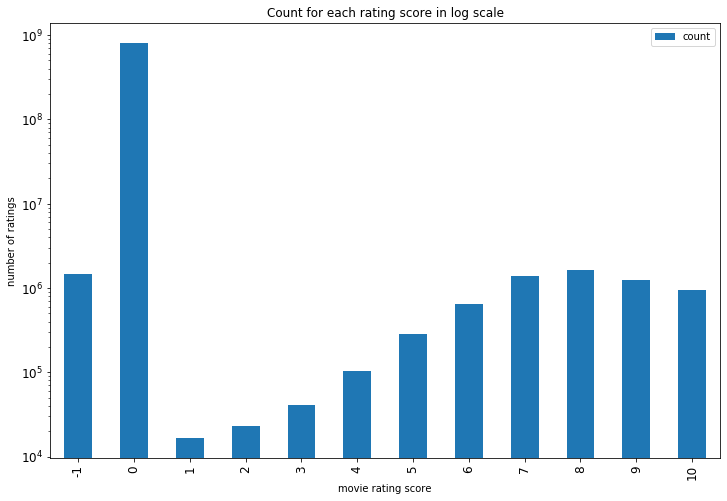

In [62]:
ax = ratings_count[['count']].reset_index().rename(columns={'index': 'rating_score'}).plot(
    x='rating_score', y='count', kind='bar', figsize=(12,8), title='Count for each rating score in log scale',
    logy=True, fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

#### 2. Plot rating frequency of all movies

In [63]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [66]:
anime_count = pd.DataFrame(ratings.groupby('anime_id').size(), columns=['count'])
anime_count.sort_values('count', ascending=False)

,count
anime_id,
1535,39340
11757,30583
16498,29584
1575,27718
226,27506
...,...
23865,1
23863,1
23861,1


In [68]:
animes[animes['anime_id'] == 1535]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


In [70]:
ratings[ratings['anime_id']== 1535]['rating'].mean()

7.556176919166243

Text(0, 0.5, 'number of ratings')

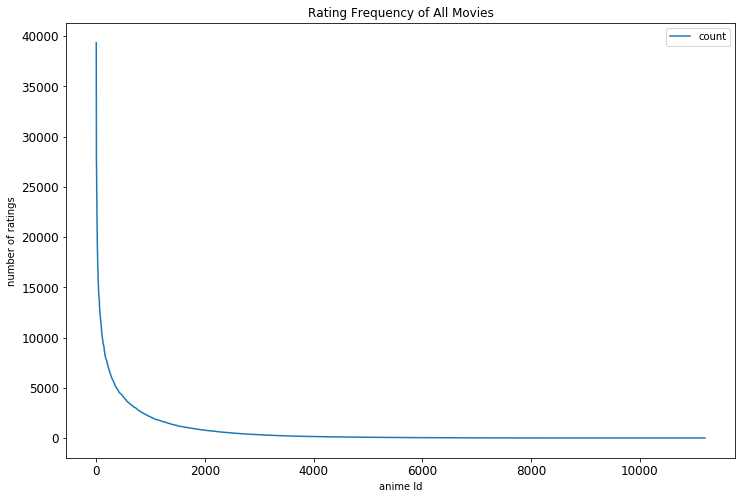

In [71]:
ax = anime_count.sort_values('count', ascending=False).reset_index(drop=True).plot(
    figsize=(12,8),
    title='Rating Frequency of All Movies',
    fontsize=12
)
ax.set_xlabel("anime Id")
ax.set_ylabel('number of ratings')

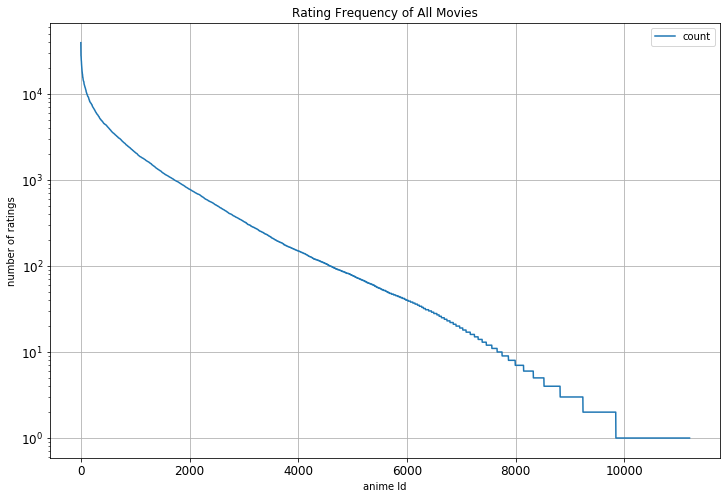

In [74]:
ax = anime_count.sort_values('count', ascending=False).reset_index(drop=True).plot(
    figsize=(12,8),
    title='Rating Frequency of All Movies',
    fontsize=12,
    logy=True
)
ax.set_xlabel("anime Id")
ax.set_ylabel('number of ratings')
ax.grid()

We can see that roughly 2,000 out of 11,200 animes are rated almost 1000 times. More interestingly, roughly almost 8,000 out of 11,200 movies are rated less than only 10 times. Let's look closer by displaying top quantiles of rating counts

In [75]:
anime_count['count'].quantile(np.arange(1,0.2,-0.05))

1.00    39340.00
0.95     3696.25
0.90     1812.50
0.85     1036.60
0.80      634.00
0.75      385.25
0.70      243.30
0.65      157.00
0.60      108.00
0.55       75.00
0.50       51.50
0.45       36.00
0.40       24.00
0.35       15.00
0.30        9.00
0.25        5.00
Name: count, dtype: float64

So about 1% of animes have roughly 39,340 or more ratings, 5% have 3,696 or more, and 20% have 634 or more. Since we have so many animes, we'll limit it to the top 25%. This is arbitrary threshold for popularity, but it gives us about 2,800 different movies. We still have pretty good amount of movies for modeling. There are two reasons why we want to filter to roughly 2,800 movies in our dataset.
 - Memory issue: we don't want to run into the “MemoryError” during model training
 - Improve KNN performance: lesser known movies have ratings from fewer viewers, making the pattern more noisy. Droping out less known movies can improve recommendation quality

In [77]:
anime_count[anime_count['count']>=390].sort_values('count')

,count
anime_id,
2499,390
11083,391
9934,391
29325,391
864,392
...,...
226,27506
1575,27718
16498,29584


In [87]:
anime_count

,count
anime_id,
1,15509
5,6927
6,11077
7,2629
8,413
...,...
34367,5
34412,1
34475,4


In [93]:
popularity_thres = 390
popular_animes = list(set(anime_count.query('count >= @popularity_thres').index))
df_popanimes = ratings[ratings['anime_id'].isin(popular_animes)]
df_popanimes

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [94]:
print('shape of original ratings data:', ratings.shape)
print('shape of popular animes:', df_popanimes.shape)

shape of original ratings data: (7813737, 3)
shape of popular animes: (7302461, 3)


In [95]:
df_popanimes.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [96]:
user_counts = pd.DataFrame(df_popanimes.groupby('user_id').size(), columns=['count'])
user_counts.sort_values('count', ascending=False).head()

,count
user_id,
48766,2768
42635,2100
57620,2071
59643,1945
45659,1869


In [97]:
len(user_counts)

73436

Text(0, 0.5, 'number_of_ratings')

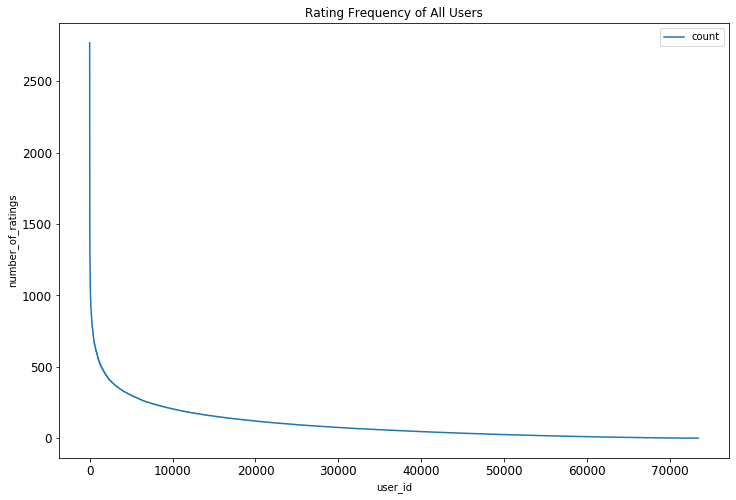

In [100]:
ax = user_counts.sort_values('count', ascending=False).reset_index(drop=True).plot(
    figsize=(12,8),
    title='Rating Frequency of All Users',
    fontsize=12
)
ax.set_xlabel("user_id")
ax.set_ylabel("number_of_ratings")

In [101]:
user_counts['count'].quantile(np.arange(1,0.5,-0.05))

1.00    2768.0
0.95     346.0
0.90     246.0
0.85     193.0
0.80     157.0
0.75     131.0
0.70     109.0
0.65      92.0
0.60      78.0
0.55      66.0
Name: count, dtype: float64

In [103]:
rating_thres = 100
active_users = list(set(user_counts.query('count >= @rating_thres').index))
df_active_users = df_popanimes[df_popanimes['user_id'].isin(active_users)]
print('shape of original ratings data:', ratings.shape)
print('shape of active users:', df_active_users.shape)

shape of original ratings data: (7813737, 3)
shape of active users: (5580347, 3)


## Train KNN model for item-based collaborative filtering
 - Reshaping the Data
 - Fitting the Model

#### 1. Reshaping the Data
For K-Nearest Neighbors, we want the data to be in an (artist, user) array, where each row is a movie and each column is a different user. To reshape the dataframe, we'll pivot the dataframe to the wide format with movies as rows and users as columns. Then we'll fill the missing observations with 0s since we're going to be performing linear algebra operations (calculating distances between vectors). Finally, we transform the values of the dataframe into a scipy sparse matrix for more efficient calculations.

In [107]:
# pivot and create movie-user matrix
movie_user_mtx = df_active_users.pivot(index='anime_id', columns='user_id', values='rating')
movie_user_mtx

user_id,1,5,7,11,13,14,17,21,29,35,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,9.0,NaN,NaN,...,NaN,10.0,9.0,NaN,NaN,9.0,10.0,9.0,NaN,10.0
5,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,9.0,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,7.0,10.0,8.0,NaN,10.0
6,NaN,8.0,NaN,NaN,-1.0,NaN,7.0,NaN,NaN,NaN,...,9.0,-1.0,9.0,NaN,NaN,9.0,9.0,9.0,NaN,10.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,9.0,NaN,7.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33524,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
movie_user_mtx = movie_user_mtx.fillna(0)

In [109]:
movie_user_mtx

user_id,1,5,7,11,13,14,17,21,29,35,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,10.0,9.0,0.0,0.0,9.0,10.0,9.0,0.0,10.0
5,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,7.0,10.0,8.0,0.0,10.0
6,0.0,8.0,0.0,0.0,-1.0,0.0,7.0,0.0,0.0,0.0,...,9.0,-1.0,9.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33524,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
